# Project 2: Photo Filters

⚠️   **Duplicate this project before you start working on it, using `File > Save a copy in drive`.**

In this project, you'll be applying filters to photos, like inversion, flipping, and grayscale- and you'll be writing all those filters yourself!

A photo can be represented in computer memory as a nested list of pixels, so playing with photos is a great way to practice your newfound list knowledge. And, of course, in order to process a nested list, you'll need nested loops, so photo filters involve lots of nested loops. You'll also learn a bit about representing pixels in the RGB color space, if you've never played with RGB before.

## From Picture to Pixels

In this first step, the program finds a picture on the web, loads the picture file into Python, and converts that file into an array of pixels. That requires the use of several external libraries, so we've written all the pixel loading code for you.

### ✏︎ For you to do:

* Read through the code and the comments. You don't need to understand every line of code, but you should roughly understand what `get_image_pixels` and `render_pixels` can do.
* Find a picture on the web. A smaller picture is actually better at first, since your program will run faster and you can iterate more quickly. Even a 200x300 pixture has 60,000 pixels!
* Replace the current value of the `url` variable with the address to your picture. That URL _must_ be to an image file (ending with an extension like .jpg/.png/.gif/.webp), not to a webpage displaying the image.

Fontconfig warning: ignoring UTF-8: not a valid region tag


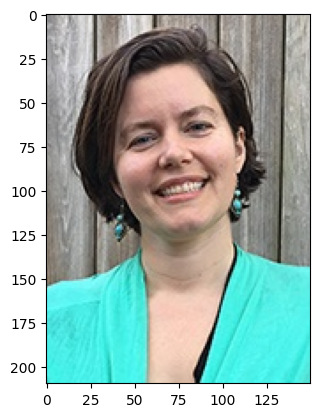

In [2]:
# Import some standard libraries
import doctest
import copy

# Import external libraries
import numpy
import cv2
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



def get_image_pixels(image_url):
  """ Returns a nested list of the pixels for the image located at image_url"""
  # Fetch the image
  image = io.imread(image_url)
  # Convert the Blue-Green-Red representation to Red-Green-Blue representation
  image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # Get an array of pixels representing the image
  pixel_data = numpy.asarray(image2).tolist()
  for row in pixel_data:
    for pixel in row:
      pixel[0], pixel[2] = pixel[2], pixel[0]
  return pixel_data

def render_pixels(pixel_data):
  """ Displays the image represented by pixel_data"""
  # Write the pixel_data to a local image file
  transformed_data = copy.deepcopy(pixel_data)
  for row in transformed_data:
    for pixel in row:
      pixel[0], pixel[2] = pixel[2], pixel[0]
  cv2.imwrite('rendered.jpg', numpy.array(transformed_data))
  # Display that image file in the notebook
  #cv2.imshow('', cv2.imread("rendered.jpg"))
  #cv2.waitKey(0)
  image = mpimg.imread('rendered.jpg')
  plt.imshow(image)
  plt.show() 


# Use the functions above to fetch pixel data and render the original data
url = 'https://www2.eecs.berkeley.edu/Faculty/Photos/Homepages/pamelafox.jpg'
pixel_data = get_image_pixels(url)
render_pixels(pixel_data)

## Exploring the Pixel Data

Before you start messing with the pixels list of your picture, let's explore how the pixels are actually stored.

We'll start with a simpler example: a picture that's just 2 pixels by 2 pixels.

rgbsquare.png

That's super small, so small it probably just looks like dirt on the screen. Here's a blown-up version so you can see each pixel:

rgbsquare_blownup.png

In the top row, the first pixel is black and the second is red. In the bottom row, the first pixel is green and the second is blue.

### ✏︎ For you to do

Run the code below to see what the entire pixel list looks like. There should only be four pixels in the list, since it's a 2x2 picture.


In [ ]:
lil_pixel_data = get_image_pixels('https://i.imgur.com/YNUJT0Y.png')
print(lil_pixel_data)

The pixels list is not just a nested list, it's a 3-dimensional nested list: a list of lists of lists.

Here's another way of formatting the list which may make the structure clearer:

```
[
  [ [0, 0, 0],  [255, 0, 0]  ],
  [ [0, 255, 0], [0, 0, 255] ]
]
```

The outer list contains lists which represents each row in the picture. Then, each of the row lists contains lists which represent each color channel in the pixel. 

Each pixel is represented using the  Red-Green-Blue (RGB) scheme for pixels, with a minimum value of 0 and maximum value of 255. The first pixel is black, which is 0 in all channels (devoid of color!). The second pixel in the top row is pure red, so there's a 255 as the first item and the other values are 0. Check out the bottom two pixels and see if the color values align with what you expect.

_If you haven't used the RGB color scheme before, play around with [this RGB color picker](https://www.rapidtables.com/web/color/RGB_Color.html) to get a feel for how different amounts of R/G/B make up different colors._

The picture you loaded in above is represented the same way in the `pixel_data` list, but it's a much longer list, so it's harder to just look at it and immediately understand each value. 

### ✏︎ For you to do

Run the code snippets below to explore different parts of the `pixel_data` list. Do the values make sense? You're welcome to do some additional exploration beyond what we've suggested.

In [ ]:
# Length of the pixels list
len(pixel_data)

In [ ]:
# Length of the first row of the pixels list
len(pixel_data[0])

In [ ]:
# The first pixel in the first row of the pixels list
pixel_data[0][0]

## Color removal filter

In this step, you'll implement three functions to remove an entire color channel from the picture: `remove_red`, `remove_green`, and `remove_blue`. 

We've started the `remove_red` function for you below. We don't want the function to mutate the original list, so the first line of the function copies the list. You should do all the transformation to that copy, not the original list passed in. The last line of the function then returns that copied list.

### ✏︎ For you to do

Finish the implementation of `remove_red`, and make sure it works by running it on your image and running the doctests. 

📺 For help getting started, [watch this video](https://youtu.be/08YNouyKwAU)

In [ ]:
def remove_red(pixel_data):
  """ Sets all red channels to 0 in a list of pixels.
  >>> remove_red([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[0, 0, 0], [0, 0, 0]], [[0, 255, 0], [0, 0, 255]]]
  >>> remove_red([[[0, 0, 0], [100, 0, 0]], [[150, 255, 0], [255, 0, 255]]])
  [[[0, 0, 0], [0, 0, 0]], [[0, 255, 0], [0, 0, 255]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

# Try it out
render_pixels(remove_red(pixel_data))

In [ ]:
# Run the doctests
doctest.run_docstring_examples(remove_red, globals(), verbose=True, name='remove_red')

### ✏︎ For you to do

Once you've successfully implemented `remove_red`, write the very similar `remove_green` and `remove_blue` functions below. You'll notice yourself repeating a lot of the same code; feel free to make an additional function to take care of that repetitive code.

_If you ever realize you've accidentally modified the original `pixel_data` instead of `new_pixel_data`, just re-run the initial code to reset that list._

In [ ]:

def remove_green(pixel_data):
  """ Sets all green channels to 0 in a list of pixels.
  >>> remove_green([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[0, 0, 0], [255, 0, 0]], [[0, 0, 0], [0, 0, 255]]]
  >>> remove_green([[[0, 0, 0], [255, 100, 0]], [[0, 255, 0], [0, 150, 255]]])
  [[[0, 0, 0], [255, 0, 0]], [[0, 0, 0], [0, 0, 255]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

def remove_blue(pixel_data):
  """ Sets all blue channels to 0 in a list of pixels.
  >>> remove_blue([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 0]]]
  >>> remove_blue([[[0, 0, 0], [255, 0, 100]], [[0, 255, 150], [0, 0, 255]]])
  [[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 0]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data
  
# Try it out
render_pixels(remove_green(pixel_data))
render_pixels(remove_blue(pixel_data))

In [ ]:
# Run the tests
doctest.run_docstring_examples(remove_green, globals(), verbose=True, name='remove_green')
doctest.run_docstring_examples(remove_blue, globals(), verbose=True, name='remove_blue')

## Color inversion

For the next filter, you'll be inverting each of the color channels, based on the fact that the maximum value of a channel is 255 and the minimum value is 0.

For example, for `invert_red`:
* If a pixel has a value of 255 for red, the new value should be 0.
* If a pixel has a value of 0 for red, the new value should be 255.
* If a pixel has a value of 100 for red, the new value should be 155.

We've provided the function signatures and doctests for the three inversion functions below. Even though the description above uses if statements, inversion can also be programmed using a bit of arithmetic.

Once again, feel free to write a helper function to take care of any redundant code across the three functions.

### ✏︎ For you to do

Finish the implementation of `invert_red`, `invert_green`, and `invert_blue`, and make sure they work by running them on your image and running the doctests. 

In [ ]:
def invert_red(pixel_data):
  """ Inverts the red channel in a list of pixels.
  >>> invert_red([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[255, 0, 0], [0, 0, 0]], [[255, 255, 0], [255, 0, 255]]]
  >>> invert_red([[[100, 100, 100]]])
  [[[155, 100, 100]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

def invert_green(pixel_data):
  """ Inverts the green channel in a list of pixels.
  >>> invert_green([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[0, 255, 0], [255, 255, 0]], [[0, 0, 0], [0, 255, 255]]]
  >>> invert_green([[[100, 100, 100]]])
  [[[100, 155, 100]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

def invert_blue(pixel_data):
  """ Inverts the blue channel in a list of pixels.
  >>> invert_blue([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[0, 0, 255], [255, 0, 255]], [[0, 255, 255], [0, 0, 0]]]
  >>> invert_blue([[[100, 100, 100]]])
  [[[100, 100, 155]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

# Try it out
render_pixels(invert_red(pixel_data))
render_pixels(invert_green(pixel_data))
render_pixels(invert_blue(pixel_data))

In [ ]:
# Run the tests
doctest.run_docstring_examples(invert_red, globals(), verbose=True, name='invert_red')
doctest.run_docstring_examples(invert_green, globals(), verbose=True, name='invert_green')
doctest.run_docstring_examples(invert_blue, globals(), verbose=True, name='invert_blue')

## Total inversion

What would it look like if we inverted all the channels in an image? In a black&white image, that would mean all the black areas (0, 0, 0) would become white (255, 255, 255).

### ✏︎ For you to do

If you've implemented the three functions above correctly, you should be able to just run the code below and see what total inversion looks like on your image. You don't need to write any code yourself, just run it and see what happens!

In [ ]:
render_pixels(invert_blue(invert_green(invert_red(pixel_data))))


## Grayscale

Woo, that was wild! Let's tone things down a bit with a grayscale filter. In a grayscale image, all the pixels are somewhere in the spectrum between black and white - from (0, 0, 0) to (255, 255, 255). That means the red, green, and blue channels are always equal in value. As soon as one channel is higher than another, we start to see that color instead.

So, to convert a pixel into a grayscale pixel, the standard approach is to take the average of of the red, green, and blue values (by summing them up and then dividing by three). Note that RGB values should only be integers, not floats, so you may need to do some rounding.

### ✏︎ For you to do

Finish the implementation of `grayscale` according to the approach described above, and make sure it works by running it on your image and running the doctests.


In [ ]:
def grayscale(pixel_data):
  """ Converts all the pixels in a pixel list to grayscale.
  >>> grayscale([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[0, 0, 0], [85, 85, 85]], [[85, 85, 85], [85, 85, 85]]]
  >>> grayscale([[[100, 50, 25], [25, 50, 125]], [[5, 10, 15], [20, 30, 40]]])
  [[[58, 58, 58], [67, 67, 67]], [[10, 10, 10], [30, 30, 30]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

# Try it out
render_pixels(grayscale(pixel_data))

In [ ]:
# Run the tests
doctest.run_docstring_examples(grayscale, globals(), verbose=True, name='grayscale')

## Mystery Filter

This filter is entirely up to you! Write a filter that transforms the image in some way that's different from the previous filters. We'll show your transformed images in lecture and see if your peers can figure out the math behind the mystery.

### ✏︎ For you to do

Write a new filter with at least one doctest.

In [ ]:
def mystery(pixel_data):
  """
  >>> mystery([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  []
  >>> mystery([[[100, 50, 25], [25, 50, 125]], [[5, 10, 15], [20, 30, 40]]])
  []
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

# Try it out
render_pixels(mystery(pixel_data))

In [ ]:
# Run the tests
doctest.run_docstring_examples(mystery, globals(), verbose=True, name='mystery')

## Flipping 🐬 (Optional Challenge)

In this step, you'll write two functions that can flip the picture, one to flip it horizontally and the other to flip it vertically.

These functions are a bit different than the previous ones that operated only on a pixel at a time. Instead, they'll need to actually change the position of each pixels inside the list (while keeping the actual pixel the same).

For example, when flipping horizontally, the very first pixel in a row will become the very last pixel instead. You may need to use a very different approach for this code, especially for flipping vertically.

### ✏︎ For you to do

Finish the implementation of `flip_horizontal` and `flip_vertical`, and make sure they work by running them on your image and running the doctests. 

📺 For additional tips, [watch this short video](https://www.youtube.com/watch?v=xY-ADtNHF5A). 


In [ ]:
def flip_horizontal(pixel_data):
  """ Flips the pixels in the list so that the left-most become the right-most.
  >>> flip_horizontal([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[255, 0, 0], [0, 0, 0]], [[0, 0, 255], [0, 255, 0]]]
  >>> flip_horizontal([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]], [[40, 50, 60], [10, 20, 30]]])
  [[[255, 0, 0], [0, 0, 0]], [[0, 0, 255], [0, 255, 0]], [[10, 20, 30], [40, 50, 60]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

def flip_vertical(pixel_data):
  """ Flips the pixels in the list so that the top-most become the bottom-most.
  >>> flip_vertical([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]]])
  [[[0, 255, 0], [0, 0, 255]], [[0, 0, 0], [255, 0, 0]]]
  >>> flip_vertical([[[0, 0, 0], [255, 0, 0]], [[0, 255, 0], [0, 0, 255]], [[40, 50, 60], [10, 20, 30]]])
  [[[40, 50, 60], [10, 20, 30]], [[0, 255, 0], [0, 0, 255]], [[0, 0, 0], [255, 0, 0]]]
  """
  new_pixel_data = copy.deepcopy(pixel_data)
  # YOUR CODE HERE
  return new_pixel_data

# Try it out
render_pixels(flip_horizontal(pixel_data))
render_pixels(flip_vertical(pixel_data))

In [ ]:
# Run the tests
doctest.run_docstring_examples(flip_horizontal, globals(), verbose=True, name='flip_horizontal')
doctest.run_docstring_examples(flip_vertical, globals(), verbose=True, name='flip_vertical')

## All done!

🎉 Congratulations! You've finished the project and are ready to unleash your image manipulation on the world. Submit the project following the pinned instructions in the #project channel.

## Extensions

If you enjoyed that project and want to keep diving further into photo manipulation, here are some ideas for additional filters to implement:


* **Horizontal blur**: There are many blurring algorithms. One of the simpler approach starts by replacing the red values of three adjacent pixels with their average, then doing the same with the green and blue values. 
* **Vertical blur**: Same as above, but computed vertically instead. The code will be more complicated since you'll need to keep track of indices (similar to the complexity of flipping vertically).
* **Extreme contrast**: Change each color channel to either 255 or 0, based on which value it's closest to.
* **Stripes**: For any of the filters already implemented, make a function that only applies it to stripes of the image (i.e. alternating stripes of 20 pixels).



## Attribution

Inspiration for this project comes from the [PPM Image Editor project](http://nifty.stanford.edu/2012/guerin-image-editor/) by Joshua Guerin T and Debby Keen, as presented at SIGCSE Nifty Projects 2012.